<a href="https://colab.research.google.com/github/arvind2022/PhishINT-Proj/blob/main/PhishINT_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

# metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_roc_curve

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
url_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Phishing/dataset_full.csv")
url_dataset.head(10)

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   
5            1               0                  0              2   
6            2               0                  0              0   
7            2               0                  0              3   
8            2               0                  0              0   
9            1               0                  0              2   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   
5                     0              0           0            0   
6                     0              0           0            0   
7                     0              0           0            0   
8                     0              0           0            0   
9                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                2   
1                    0              0  ...                1                2   
2                    0              0  ...                1                2   
3                    0              0  ...                1                2   
4                    0              0  ...                1                2   
5                    0              0  ...                1                3   
6                    0              0  ...                1                2   
7                    0              0  ...                1                2   
8                    0              0  ...                1                4   
9                    0              0  ...                1                2   

   qty_mx_servers  ttl_hostname  tls_ssl_certificate  qty_redirects  \
0               0           892                    0              0   
1               1          9540                    1              0   
2               3           589                    1              0   
3               0           292                    1              0   
4               1          3597                    0              1   
5               3          3591                    1              0   
6               2           291                    0              0   
7               1          3134                    1              0   
8               2          3596                    1              1   
9               1         14397                    1              0   

   url_google_index  domain_google_index  url_shortened  phishing  
0                 0                    0              0         1  
1                 0                    0              0         1  
2                 0                    0              0         0  
3                 0                    0              0         1  
4                 0                    0              0         0  
5                 0                    0              0         1  
6                 0                    0              0         0  
7                 0                    0              0         0  
8                 0                    0              0         0  
9                 0                    0              0         1  

[10 rows x 112 columns]

# New Section

# New Section

In [4]:
url_dataset.columns.T

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [5]:
url_dataset.shape

(88647, 112)

In [6]:
# making data frame 
url_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Phishing/dataset_full.csv") 


# iterating the columns
for col in url_dataset.columns:
  print(col)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_slash_url
qty_questionmark_url
qty_equal_url
qty_at_url
qty_and_url
qty_exclamation_url
qty_space_url
qty_tilde_url
qty_comma_url
qty_plus_url
qty_asterisk_url
qty_hashtag_url
qty_dollar_url
qty_percent_url
qty_tld_url
length_url
qty_dot_domain
qty_hyphen_domain
qty_underline_domain
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_at_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain
qty_vowels_domain
domain_length
domain_in_ip
server_client_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
qty_slash_directory
qty_questionmark_directory
qty_equal_directory
qty_at_directory
qty_and_directory
qty_exclamation_directory
qty_space_directory
qty_tilde_directory
qty_comma_directory
qty_plus_directory
qty_asterisk_directory
qty_hashtag_directory
qty_dollar_directory
qty_percent_

In [7]:
from collections import Counter
diffPhishCount = Counter(url_dataset["phishing"].values)
diffPhishCount.most_common()
diffValTable = pd.DataFrame(diffPhishCount.most_common(), columns=["Phish URL Type","URl Count"])
diffValTable

Phish URL Type  URl Count
0               0      58000
1               1      30647

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Phishing/dataset_full.csv', low_memory=False)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

print(df.corr()['phishing'].sort_values())

time_domain_activation       -0.441875
qty_dot_domain               -0.260480
time_domain_expiration       -0.165915
qty_mx_servers               -0.079580
qty_nameservers              -0.066336
qty_redirects                -0.061775
tls_ssl_certificate          -0.036249
qty_ip_resolved              -0.029340
ttl_hostname                 -0.010740
url_google_index             -0.008986
domain_spf                   -0.005582
qty_underline_domain         -0.004514
domain_google_index           0.000794
server_client_domain          0.002855
qty_at_domain                 0.004621
qty_plus_url                  0.008043
domain_length                 0.009736
qty_hashtag_url               0.011327
qty_space_url                 0.019224
qty_asterisk_url              0.020681
qty_percent_url               0.025766
qty_dollar_url                0.026142
qty_comma_url                 0.028606
qty_exclamation_url           0.032796
time_response                 0.033274
qty_tilde_url            

In [9]:
df.drop(['qty_ip_resolved'              
,'ttl_hostname'                 
,'url_google_index'             
,'domain_spf'                   
,'qty_underline_domain'         
,'domain_google_index'           
,'server_client_domain'          
,'qty_at_domain'                 
,'qty_plus_url'                  
,'domain_length'                 
,'qty_hashtag_url'               
,'qty_space_url'                 
,'qty_asterisk_url'              
,'qty_percent_url'               
,'qty_dollar_url'                
,'qty_comma_url'                 
,'qty_slash_domain'                   
,'qty_questionmark_domain'            
,'qty_equal_domain'                   
,'qty_and_domain'                     
,'qty_exclamation_domain'             
,'qty_space_domain'                   
,'qty_tilde_domain'                   
,'qty_comma_domain'                   
,'qty_plus_domain'                    
,'qty_asterisk_domain'               
,'qty_hashtag_domain'                 
,'qty_dollar_domain','qty_percent_domain'],axis=1,inplace=True)
print(len(df.columns))

83


In [10]:
df.shape

(88647, 83)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   qty_dot_url                 88647 non-null  int64  
 1   qty_hyphen_url              88647 non-null  int64  
 2   qty_underline_url           88647 non-null  int64  
 3   qty_slash_url               88647 non-null  int64  
 4   qty_questionmark_url        88647 non-null  int64  
 5   qty_equal_url               88647 non-null  int64  
 6   qty_at_url                  88647 non-null  int64  
 7   qty_and_url                 88647 non-null  int64  
 8   qty_exclamation_url         88647 non-null  int64  
 9   qty_tilde_url               88647 non-null  int64  
 10  qty_tld_url                 88647 non-null  int64  
 11  length_url                  88647 non-null  int64  
 12  qty_dot_domain              88647 non-null  int64  
 13  qty_hyphen_domain           886

In [12]:
url_dataset.nunique()

qty_dot_url                      23
qty_hyphen_url                   30
qty_underline_url                22
qty_slash_url                    25
qty_questionmark_url              6
qty_equal_url                    20
qty_at_url                       15
qty_and_url                      21
qty_exclamation_url              10
qty_space_url                     8
qty_tilde_url                     6
qty_comma_url                     8
qty_plus_url                     10
qty_asterisk_url                 18
qty_hashtag_url                   7
qty_dollar_url                   10
qty_percent_url                  52
qty_tld_url                       9
length_url                      453
qty_dot_domain                   19
qty_hyphen_domain                12
qty_underline_domain              4
qty_slash_domain                  1
qty_questionmark_domain           1
qty_equal_domain                  1
qty_at_domain                     2
qty_and_domain                    1
qty_exclamation_domain      

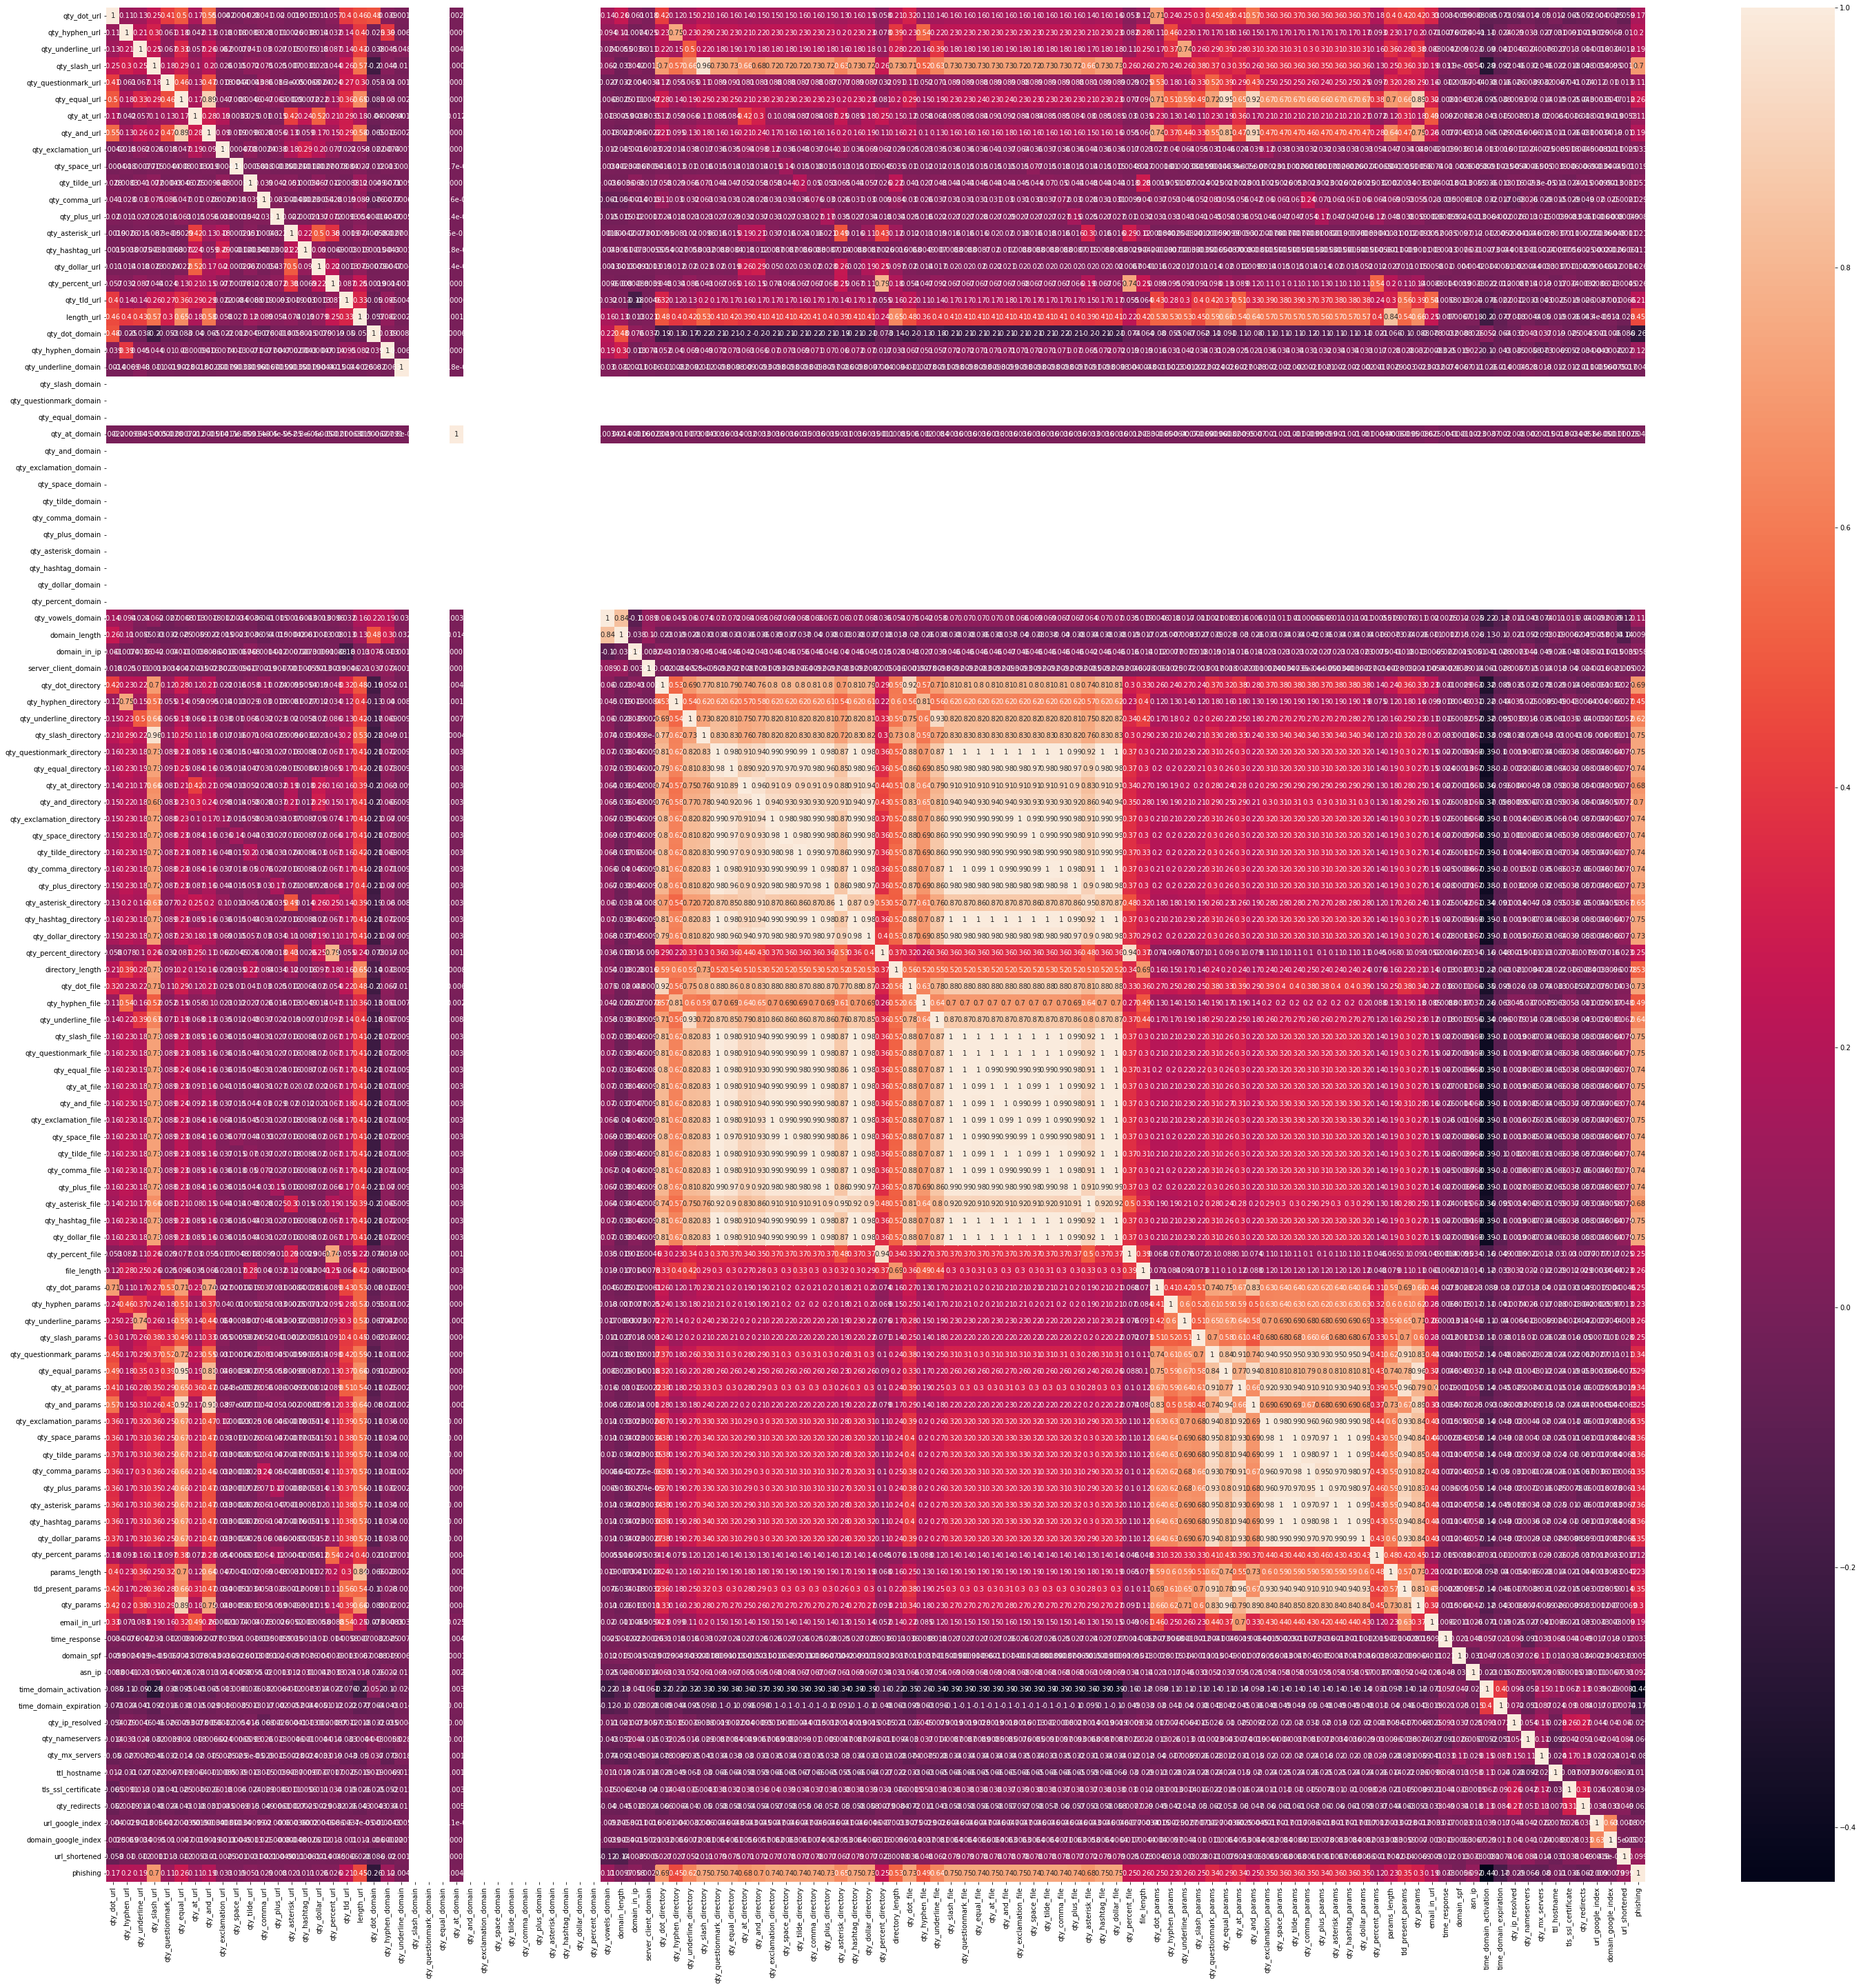

In [13]:
plt.figure(figsize=(50,50))
sns.heatmap(url_dataset.corr(), annot=True)
plt.show()

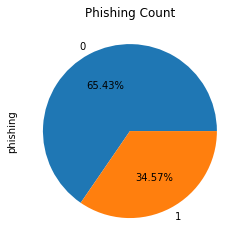

In [14]:
url_dataset['phishing'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [15]:
# Splitting the dataset into dependant and independant fetature

X = url_dataset.drop(["phishing"],axis =1)
y = url_dataset["phishing"]
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70917, 111), (70917,), (17730, 111), (17730,))

In [16]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [17]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

In [18]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [19]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)
log_predict=log.predict(X_test)

In [20]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.912
Logistic Regression : Accuracy on test Data: 0.914

Logistic Regression : f1_score on training Data: 0.877
Logistic Regression : f1_score on test Data: 0.879

Logistic Regression : Recall on training Data: 0.904
Logistic Regression : Recall on test Data: 0.908

Logistic Regression : precision on training Data: 0.851
Logistic Regression : precision on test Data: 0.851


In [21]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11612
           1       0.85      0.91      0.88      6118

    accuracy                           0.91     17730
   macro avg       0.90      0.91      0.91     17730
weighted avg       0.92      0.91      0.91     17730



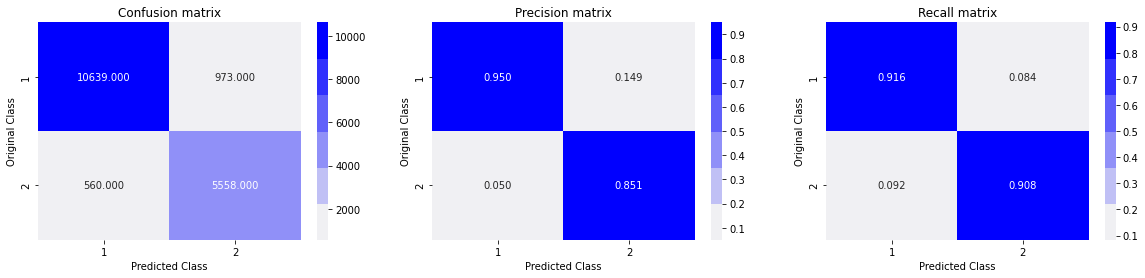

In [22]:
plot_confusion_matrix(y_test, log_predict)

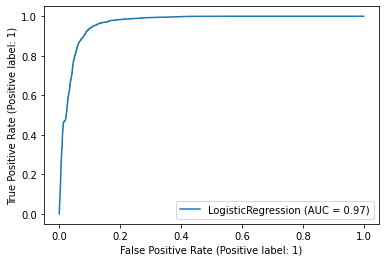

In [23]:
plot_roc_curve(log,X_test, y_test)

In [24]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [25]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [26]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)
nb_predict=log.predict(X_test)

In [27]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.839
Naive Bayes Classifier : Accuracy on test Data: 0.837

Naive Bayes Classifier : f1_score on training Data: 0.726
Naive Bayes Classifier : f1_score on test Data: 0.721

Naive Bayes Classifier : Recall on training Data: 0.616
Naive Bayes Classifier : Recall on test Data: 0.610

Naive Bayes Classifier : precision on training Data: 0.884
Naive Bayes Classifier : precision on test Data: 0.881


In [28]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     11612
           1       0.88      0.61      0.72      6118

    accuracy                           0.84     17730
   macro avg       0.85      0.78      0.80     17730
weighted avg       0.84      0.84      0.83     17730



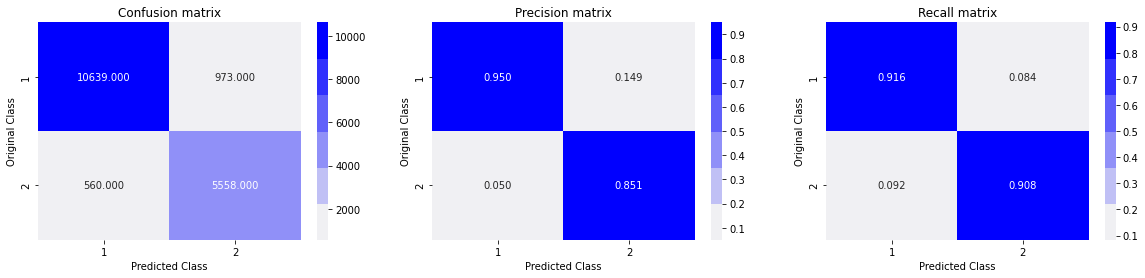

In [29]:
plot_confusion_matrix(y_test, nb_predict)

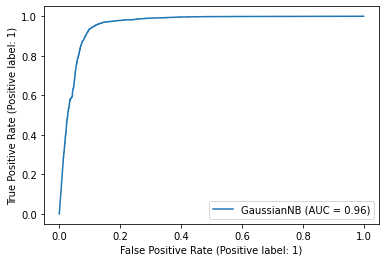

In [30]:
plot_roc_curve(nb,X_test, y_test)

In [31]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [32]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [33]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)
tree_predict=log.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.954

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 0.934

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 0.940

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 0.929


In [35]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     11612
           1       0.93      0.94      0.93      6118

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



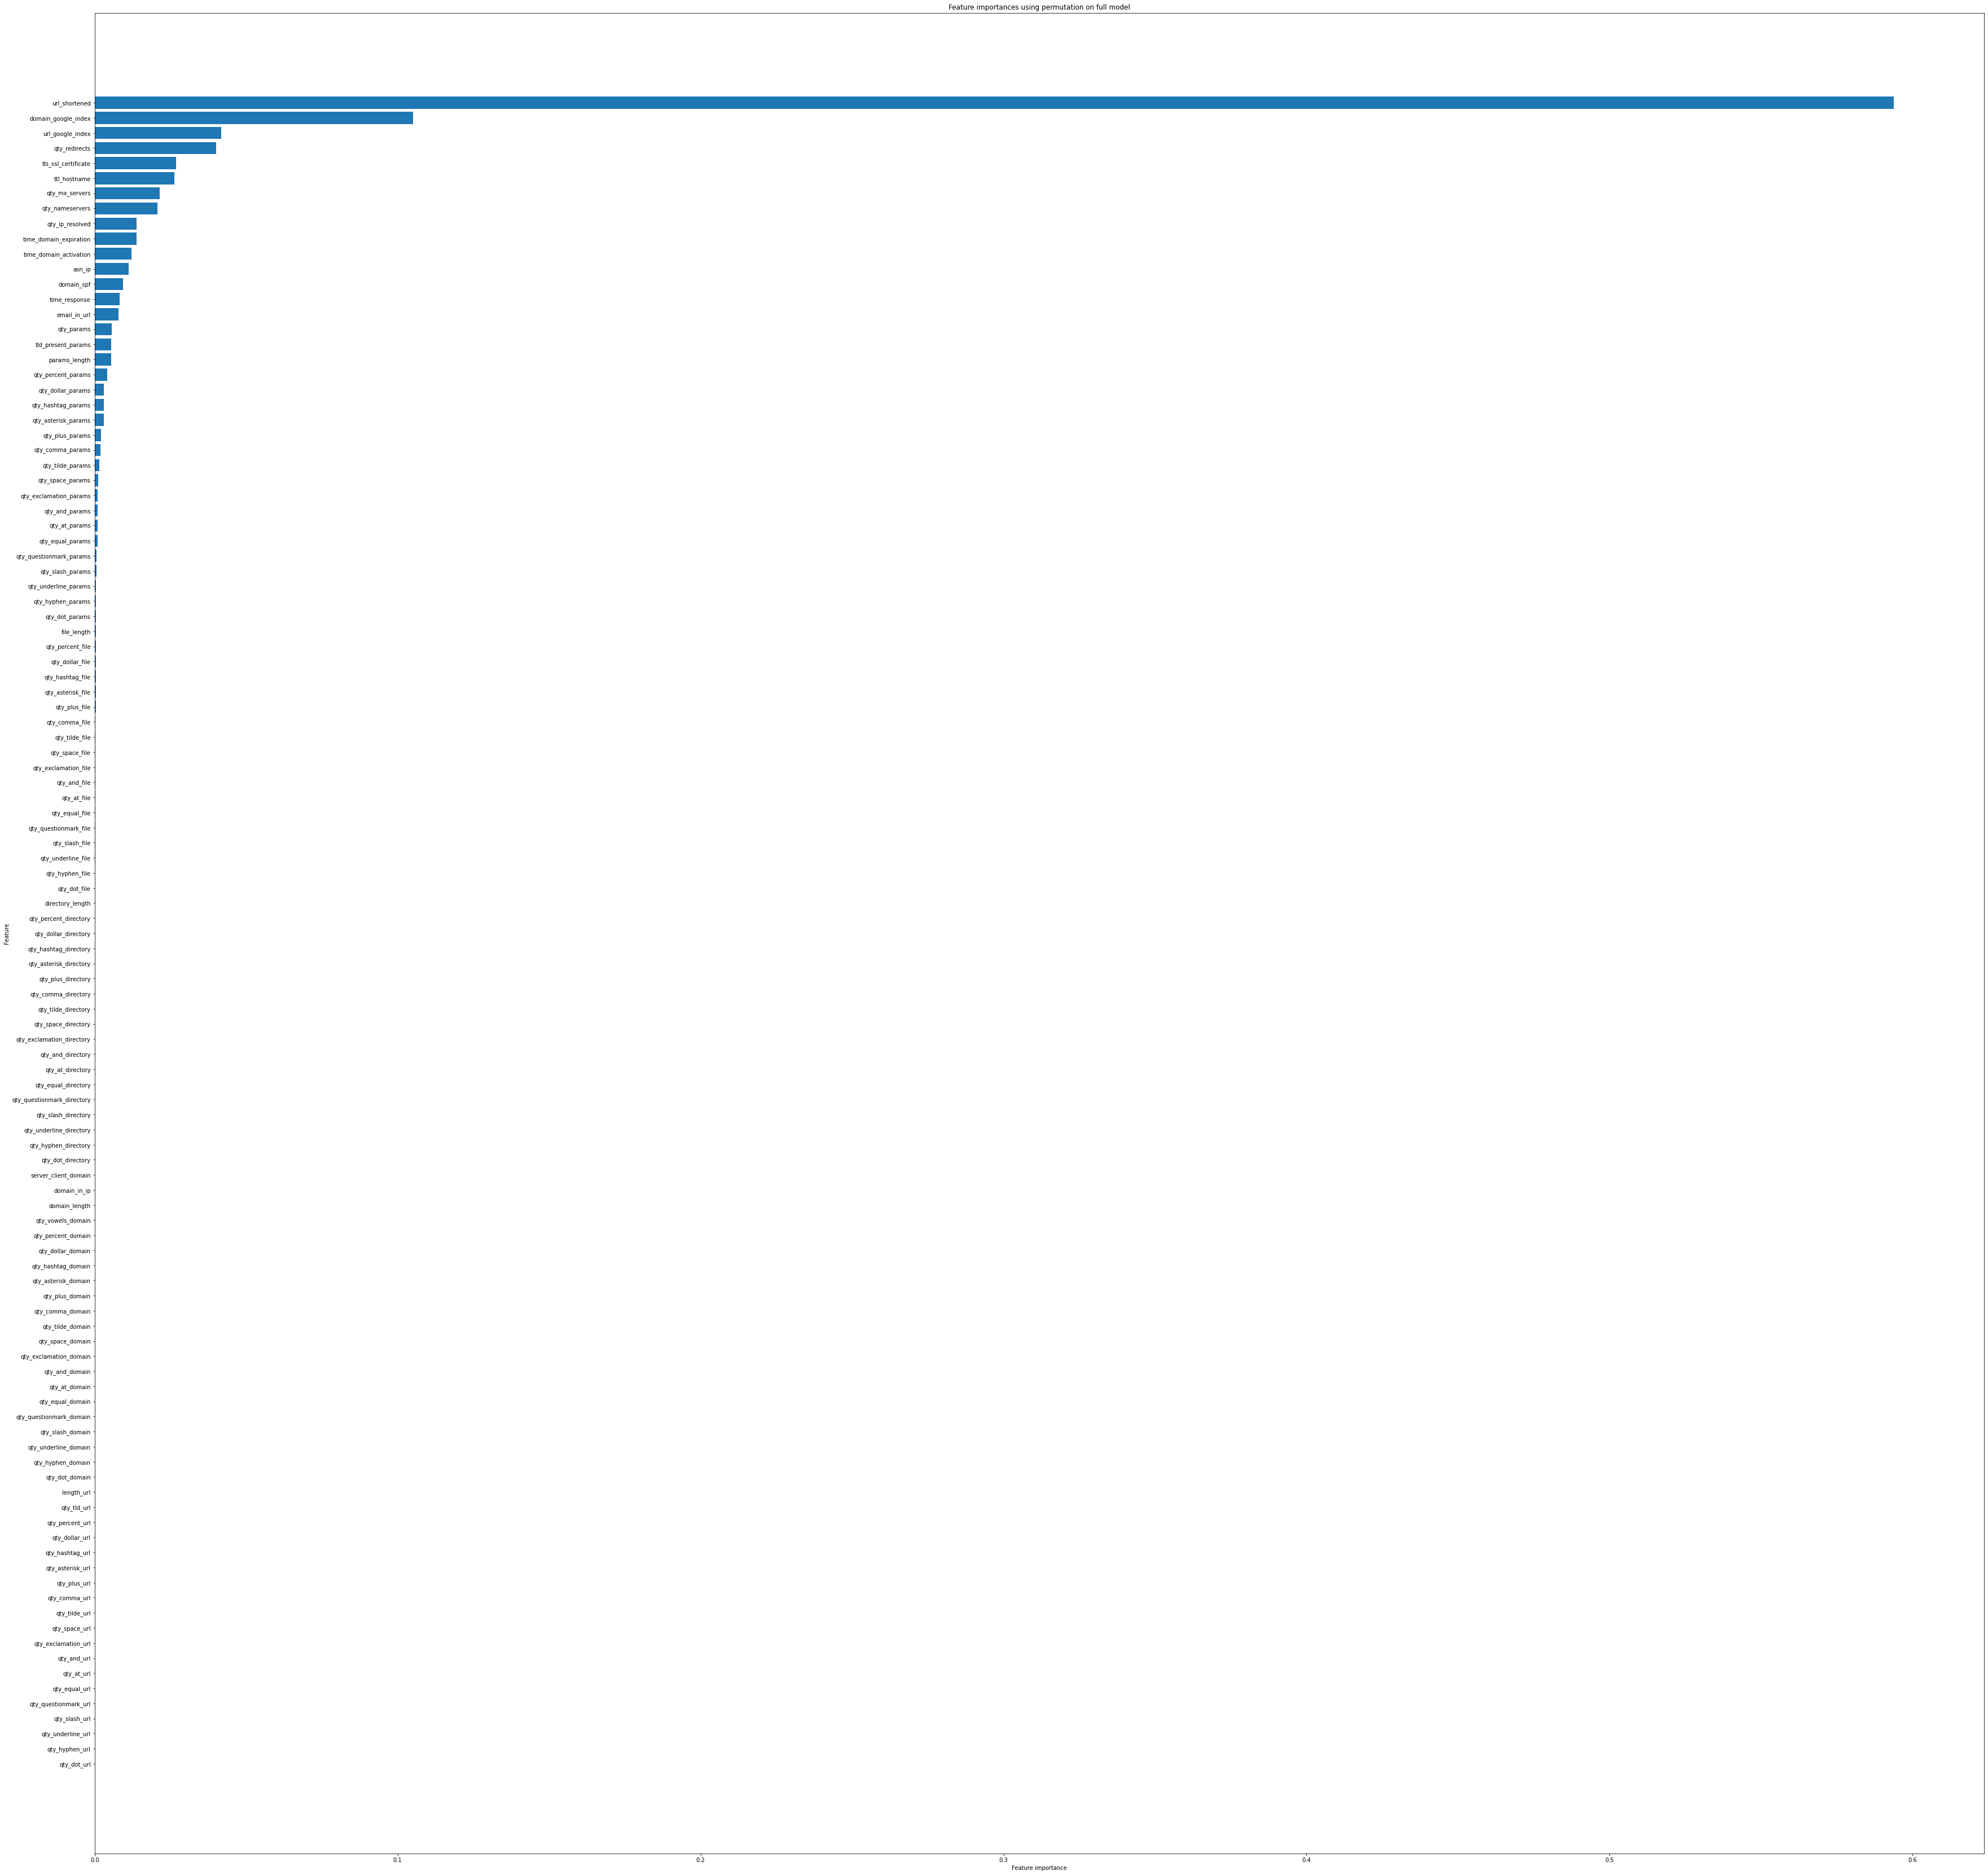

In [36]:
#checking the feature improtance in the model
plt.figure(figsize=(60,60))
n_features = X_train.shape[1]
sorted_ind = tree.feature_importances_.argsort()
plt.barh(range(n_features), tree.feature_importances_[sorted_ind], align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

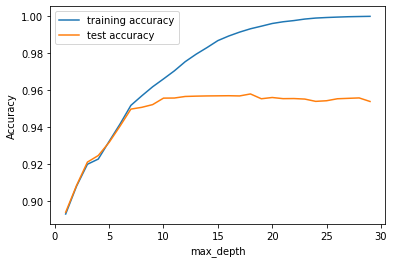

In [37]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

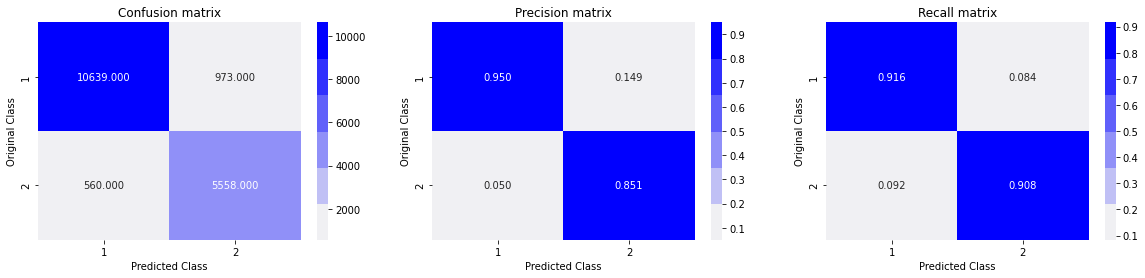

In [38]:
plot_confusion_matrix(y_test, tree_predict)

In [39]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [40]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier()

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)
forest_predict=log.predict(X_test)

In [42]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 1.000
Random Forest : Accuracy on test Data: 0.969

Random Forest : f1_score on training Data: 1.000
Random Forest : f1_score on test Data: 0.955

Random Forest : Recall on training Data: 1.000
Random Forest : Recall on test Data: 0.960

Random Forest : precision on training Data: 1.000
Random Forest : precision on test Data: 0.929


In [43]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11612
           1       0.95      0.96      0.96      6118

    accuracy                           0.97     17730
   macro avg       0.96      0.97      0.97     17730
weighted avg       0.97      0.97      0.97     17730



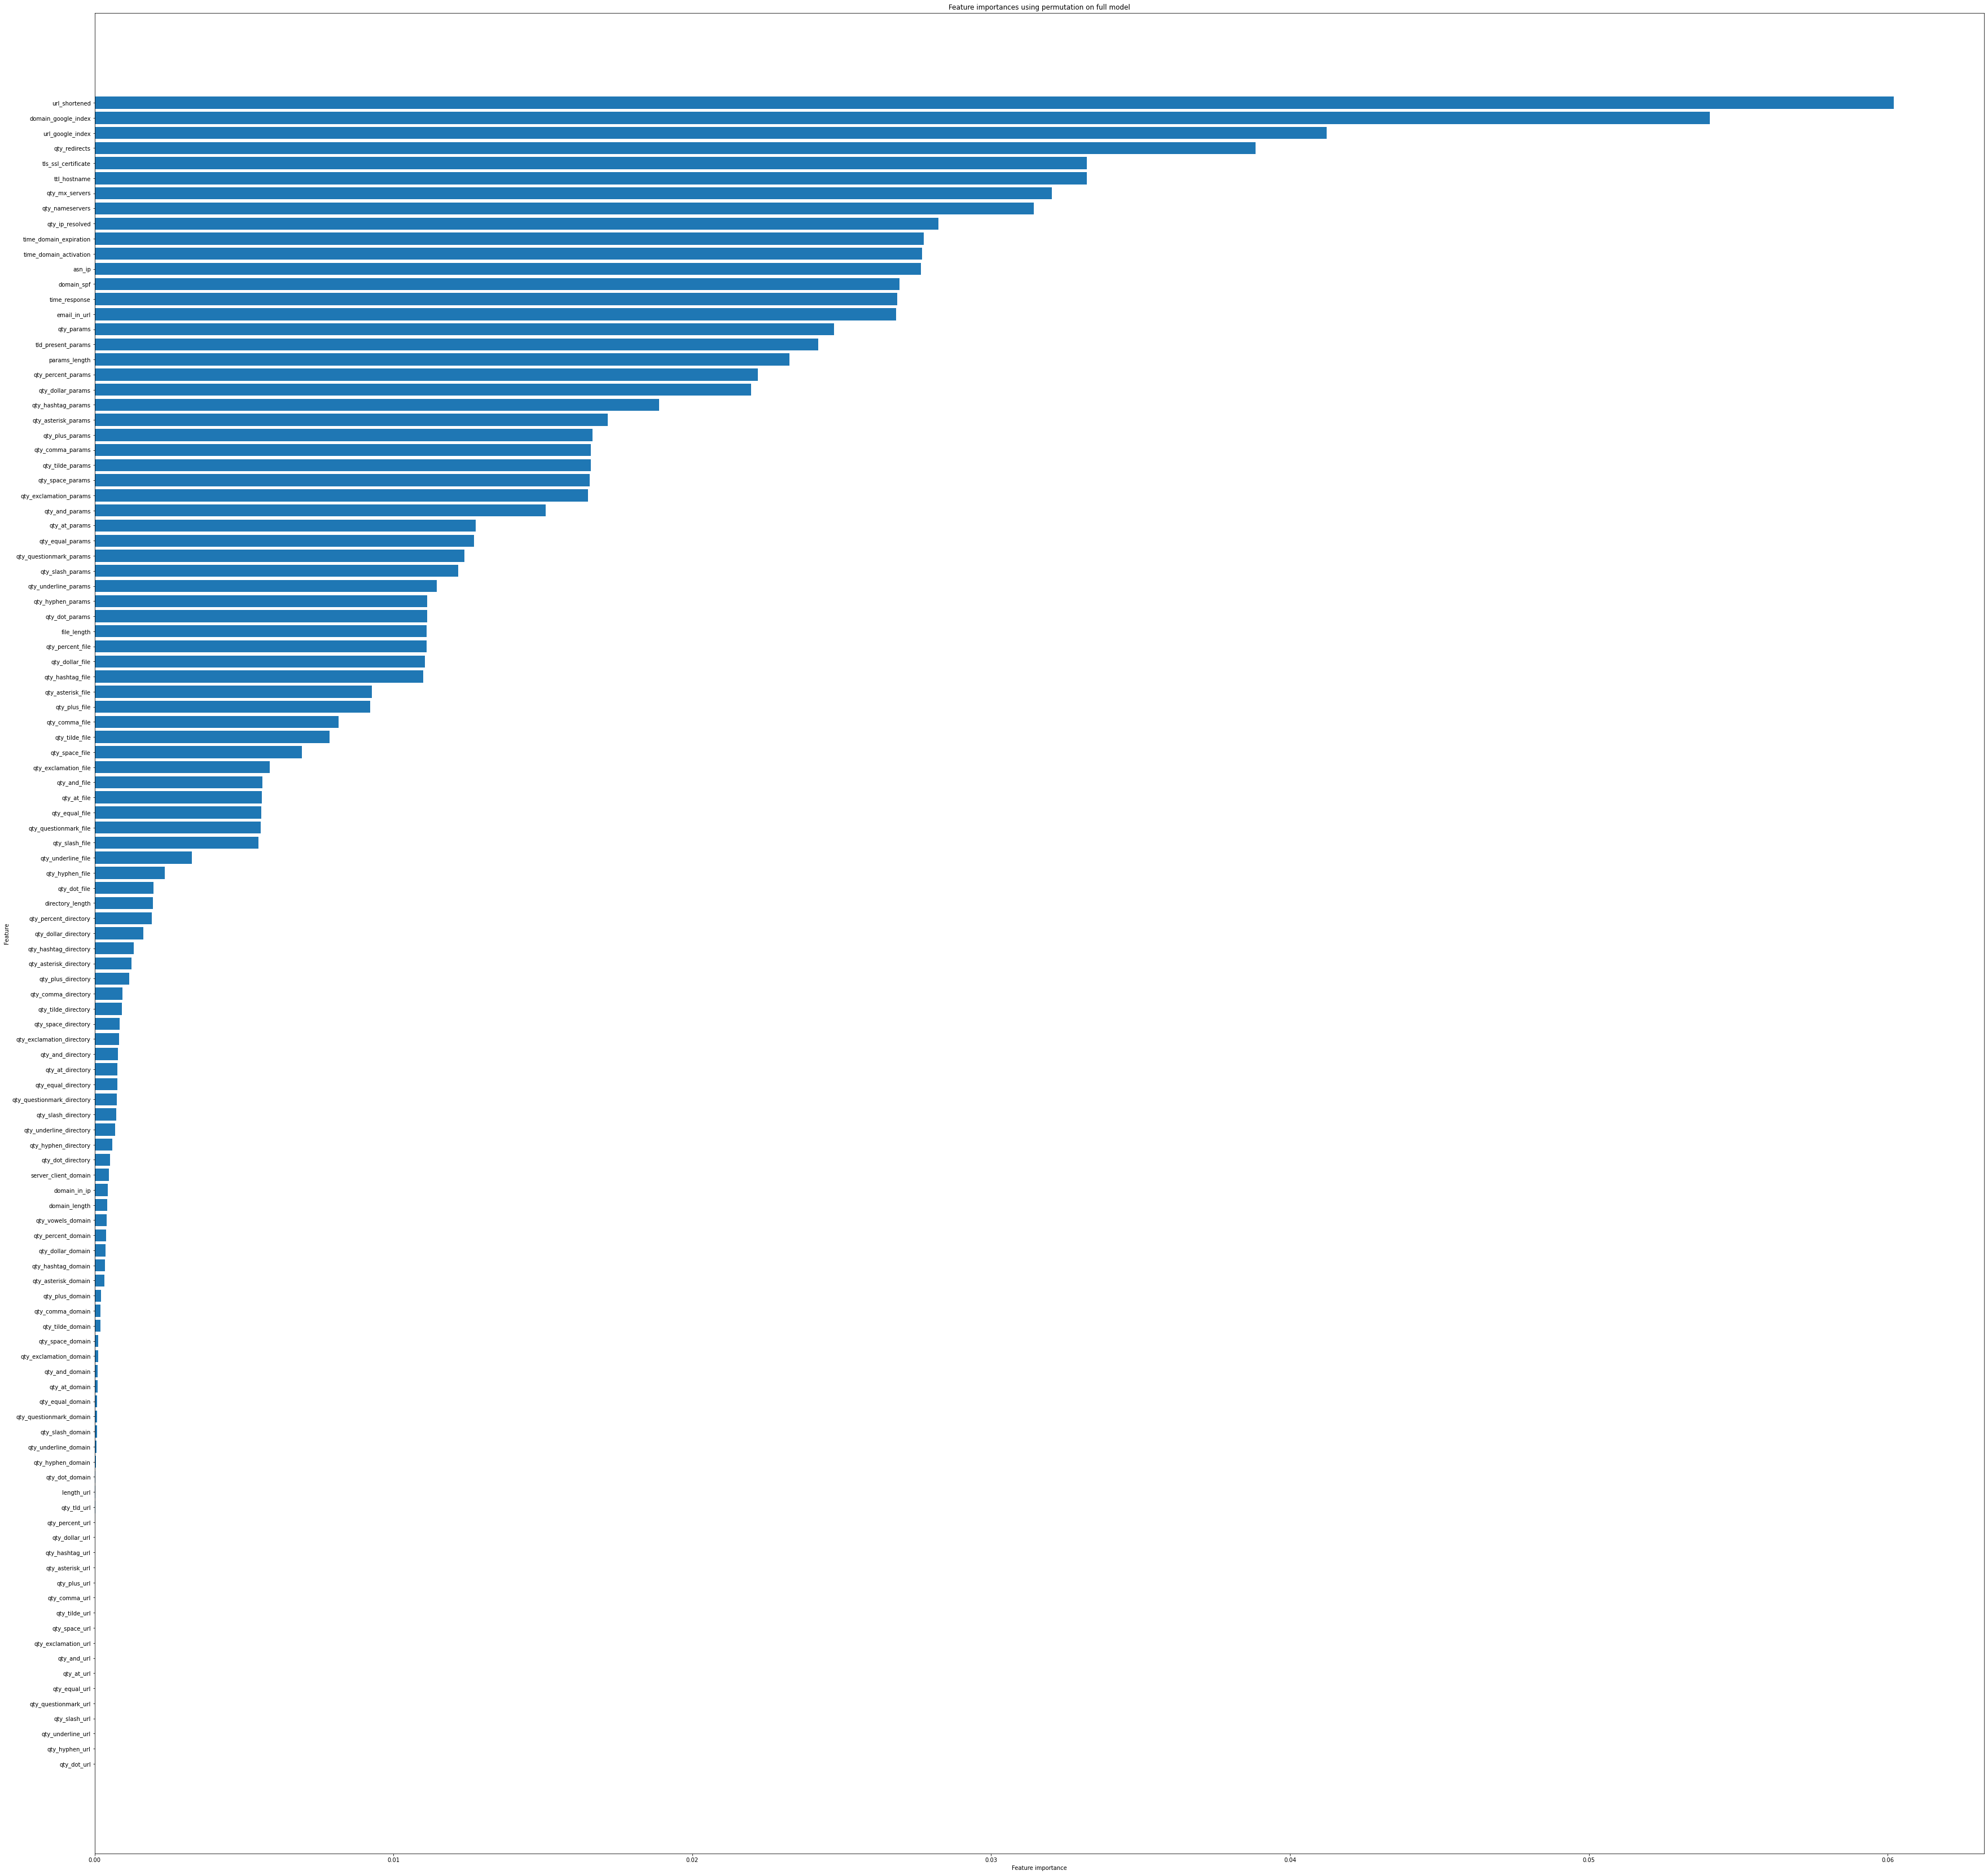

In [44]:
#checking the feature improtance in the model
plt.figure(figsize=(60,60))
n_features = X_train.shape[1]
sorted_ind = forest.feature_importances_.argsort()
plt.barh(range(n_features), forest.feature_importances_[sorted_ind], align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

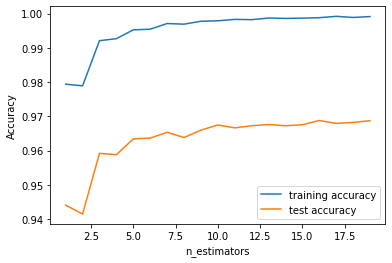

In [45]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

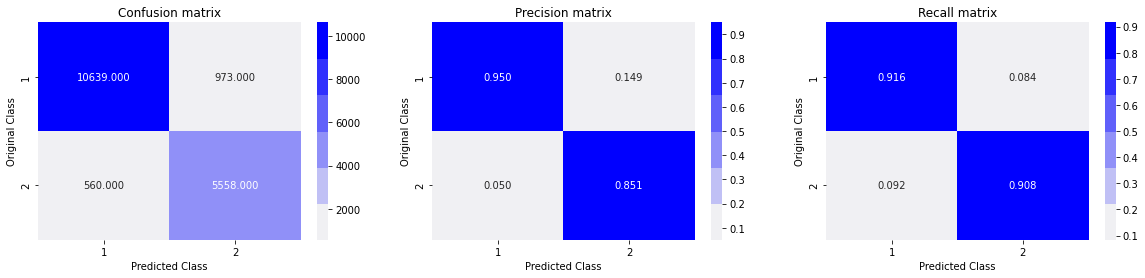

In [46]:
plot_confusion_matrix(y_test, forest_predict)

In [47]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [48]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier()

In [49]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)
xgb_predict=xgb.predict(X_test)

In [50]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.954
XGBoost Classifier : Accuracy on test Data: 0.954

XGBoost Classifier : f1_score on training Data: 0.934
XGBoost Classifier : f1_score on test Data: 0.934

XGBoost Classifier : Recall on training Data: 0.938
XGBoost Classifier : Recall on test Data: 0.938

XGBoost Classifier : precision on training Data: 0.930
XGBoost Classifier : precision on test Data: 0.930


In [51]:
print(metrics.classification_report(y_test, y_test_xgb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11612
           1       0.93      0.94      0.93      6118

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



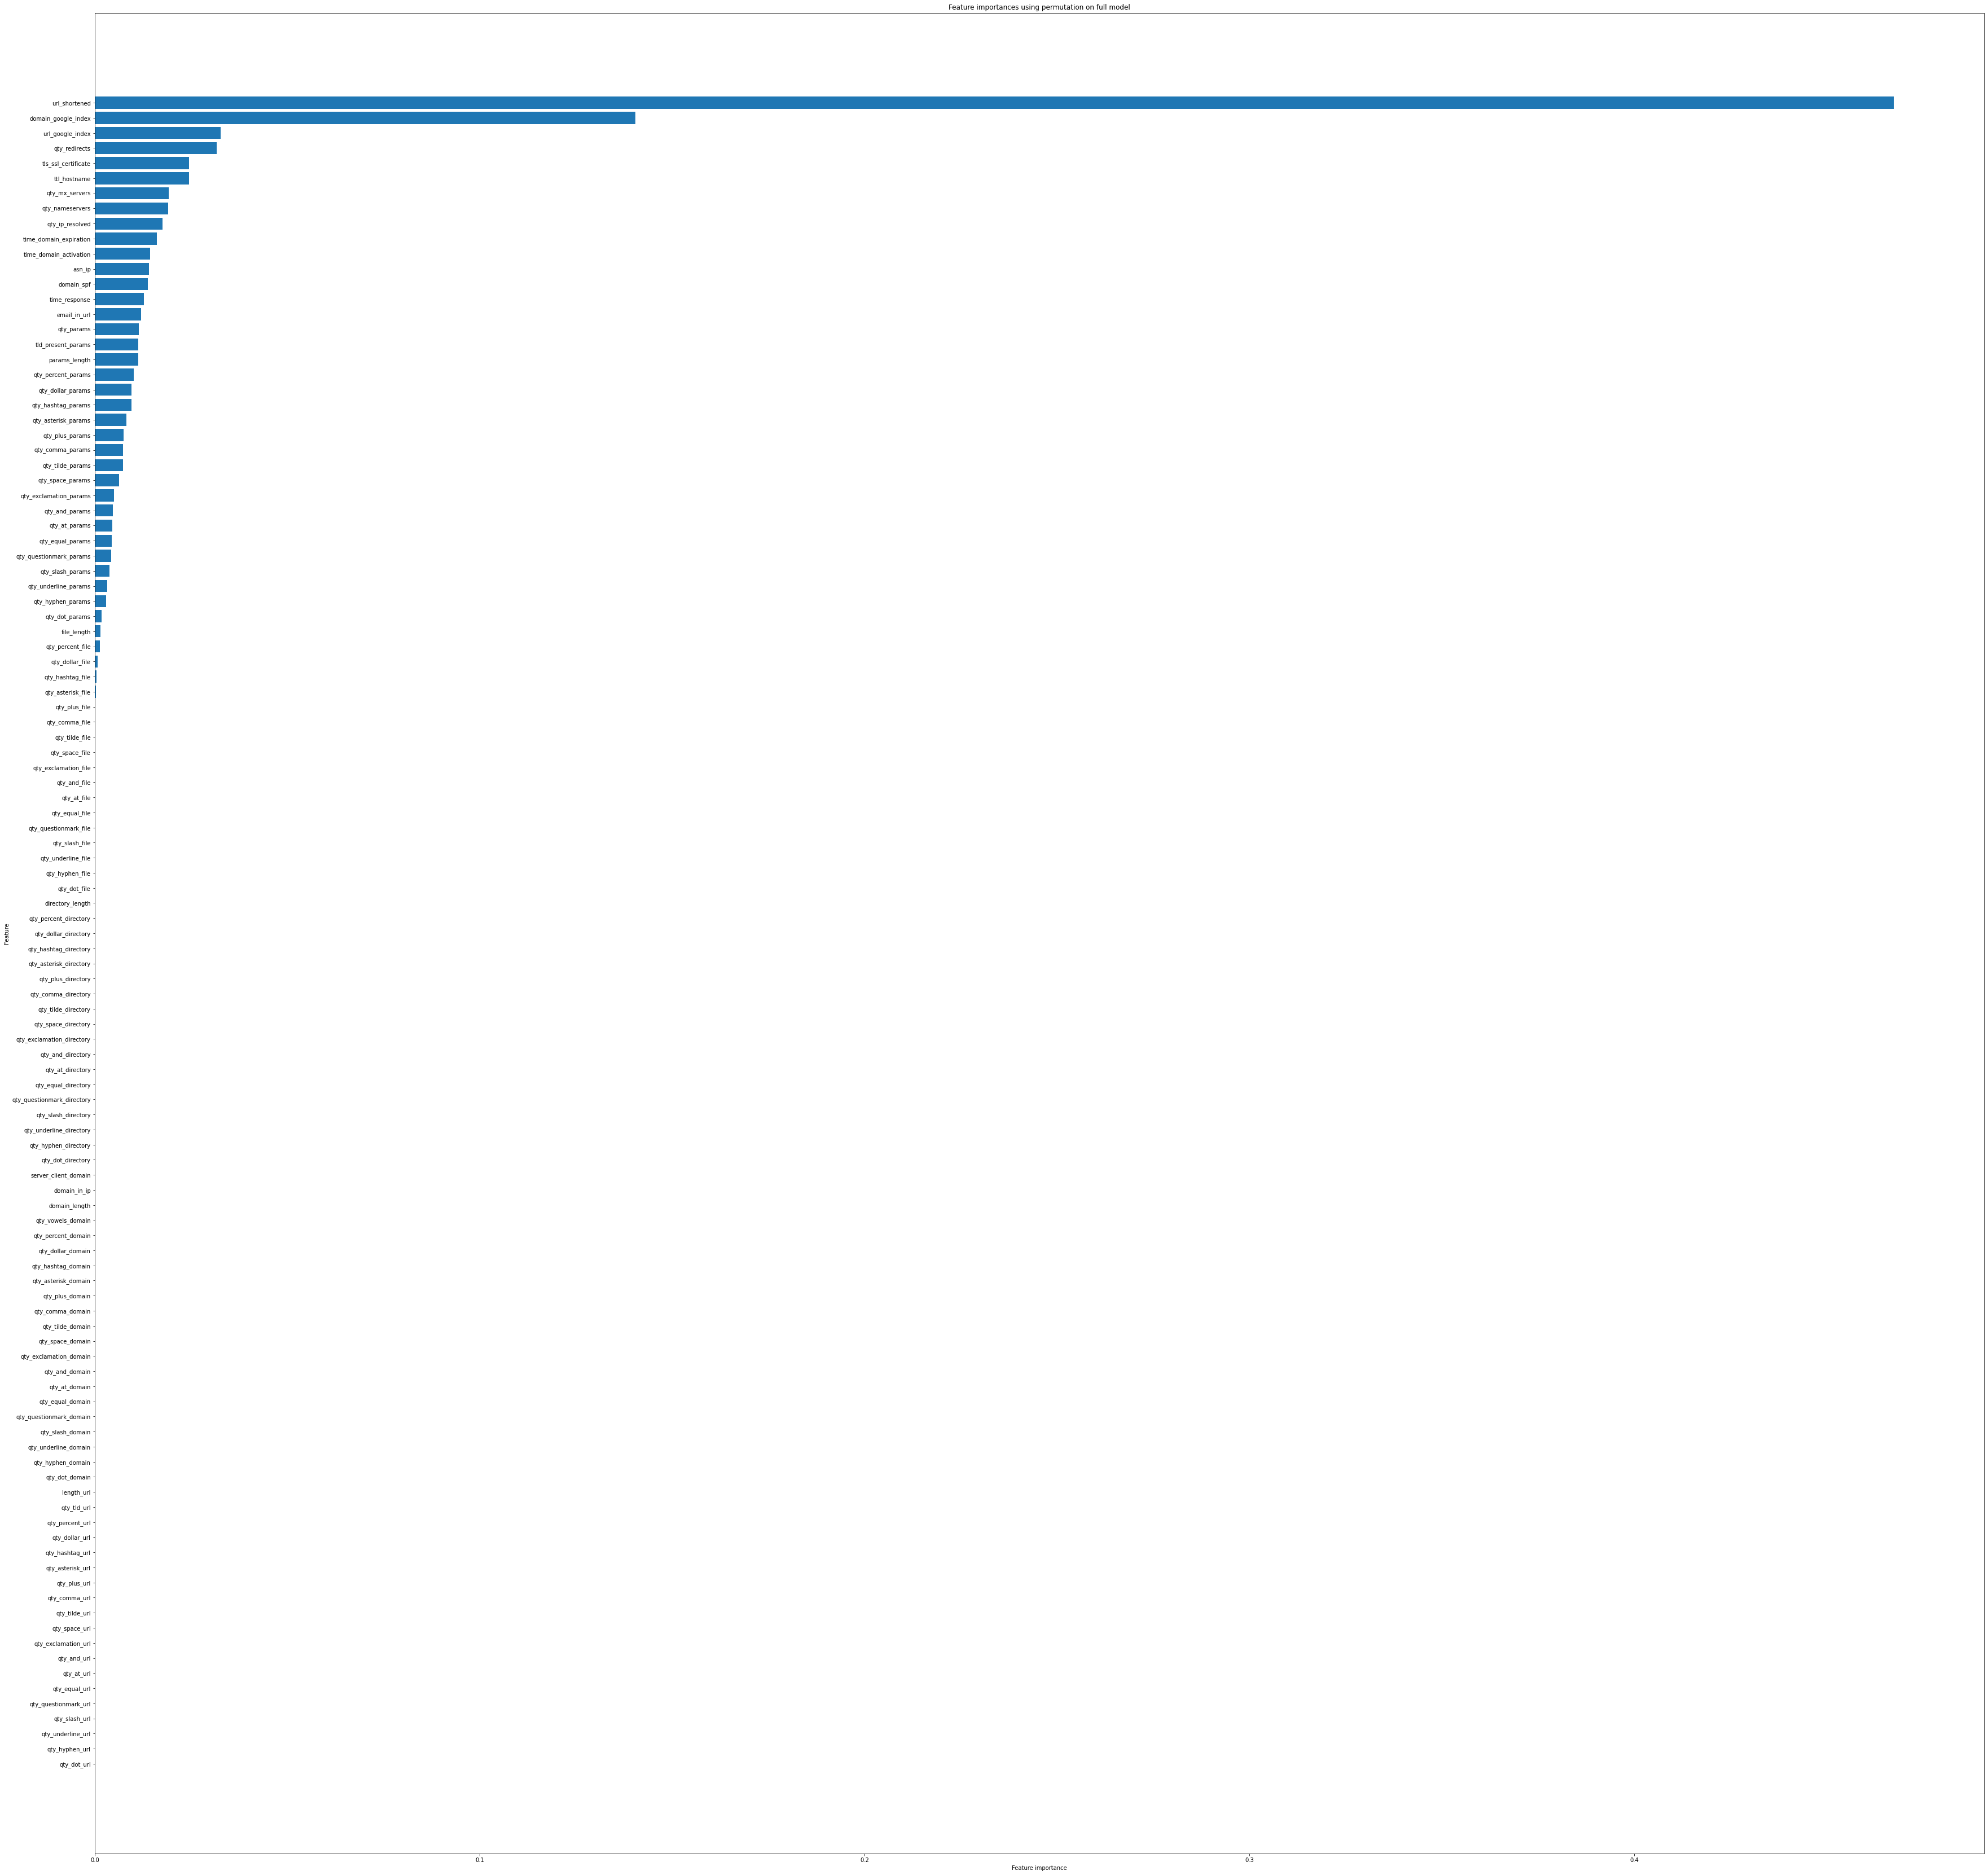

In [52]:
#checking the feature improtance in the model
plt.figure(figsize=(60,60))
n_features = X_train.shape[1]
sorted_ind = xgb.feature_importances_.argsort()
plt.barh(range(n_features), xgb.feature_importances_[sorted_ind], align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

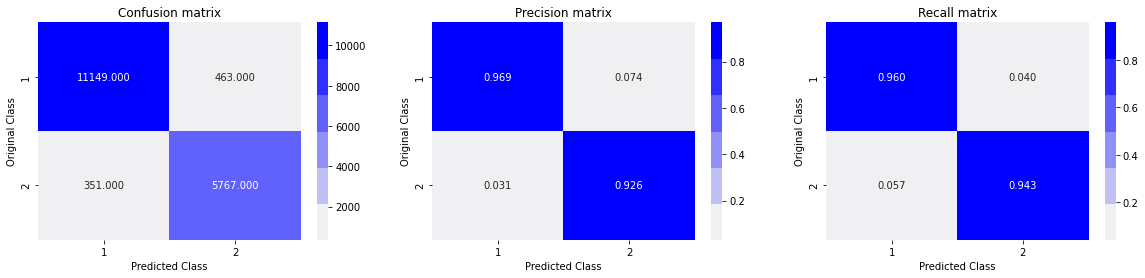

In [53]:
plot_confusion_matrix(y_test, xgb_predict)

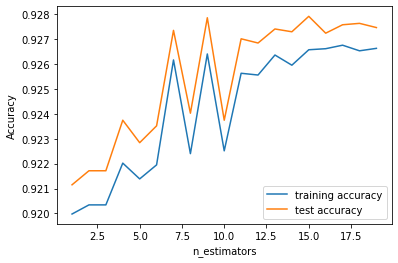

In [54]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    xgb_test =  XGBClassifier(n_estimators=n)

    xgb_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(xgb_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(xgb_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [55]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [56]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)
knn_predict=knn.predict(X_test)

In [58]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 1.000
K-Nearest Neighbors : Accuracy on test Data: 0.894

K-Nearest Neighbors : f1_score on training Data: 1.000
K-Nearest Neighbors : f1_score on test Data: 0.848

K-Nearest Neighborsn : Recall on training Data: 1.000
Logistic Regression : Recall on test Data: 0.853

K-Nearest Neighbors : precision on training Data: 1.000
K-Nearest Neighbors : precision on test Data: 0.843


In [59]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11612
           1       0.84      0.85      0.85      6118

    accuracy                           0.89     17730
   macro avg       0.88      0.88      0.88     17730
weighted avg       0.89      0.89      0.89     17730



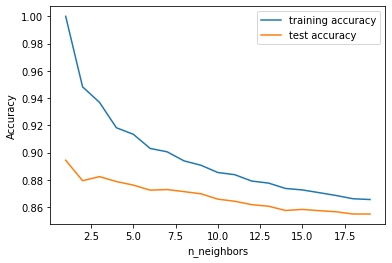

In [60]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

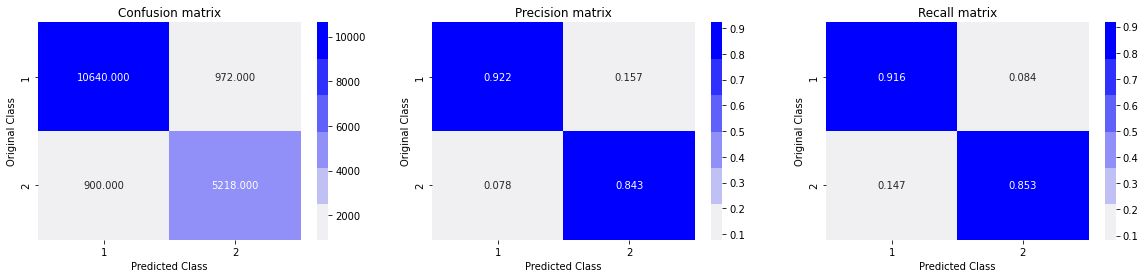

In [61]:
plot_confusion_matrix(y_test, knn_predict)

In [62]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [63]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [64]:
result

ML Model  Accuracy  f1_score  Recall  Precision
0     Logistic Regression     0.914     0.879   0.904      0.851
1  Naive Bayes Classifier     0.837     0.721   0.616      0.884
2           Decision Tree     0.954     0.934   1.000      1.000
3           Random Forest     0.969     0.955   1.000      1.000
4      XGBoost Classifier     0.954     0.934   0.938      0.930
5     K-Nearest Neighbors     0.894     0.848   1.000      1.000

In [65]:
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
sorted_result

ML Model  Accuracy  f1_score  Recall  Precision
0           Random Forest     0.969     0.955   1.000      1.000
1           Decision Tree     0.954     0.934   1.000      1.000
2      XGBoost Classifier     0.954     0.934   0.938      0.930
3     Logistic Regression     0.914     0.879   0.904      0.851
4     K-Nearest Neighbors     0.894     0.848   1.000      1.000
5  Naive Bayes Classifier     0.837     0.721   0.616      0.884

Feature ranking:
1. feature 50 (0.059881)
2. feature 72 (0.057179)
3. feature 71 (0.050648)
4. feature 3 (0.039776)
5. feature 66 (0.036357)
6. feature 59 (0.032392)
7. feature 74 (0.032031)
8. feature 73 (0.031711)
9. feature 69 (0.030531)
10. feature 63 (0.030227)
11. feature 62 (0.029385)
12. feature 57 (0.027295)
13. feature 18 (0.026622)
14. feature 55 (0.026533)
15. feature 100 (0.026033)
16. feature 52 (0.024332)
17. feature 61 (0.023936)
18. feature 75 (0.023235)
19. feature 60 (0.022753)
20. feature 64 (0.021616)
21. feature 68 (0.019827)
22. feature 43 (0.019528)
23. feature 49 (0.018634)
24. feature 56 (0.018581)
25. feature 67 (0.016281)
26. feature 45 (0.016129)
27. feature 58 (0.015795)
28. feature 54 (0.015561)
29. feature 51 (0.014528)
30. feature 19 (0.011326)
31. feature 48 (0.010777)
32. feature 46 (0.008165)
33. feature 44 (0.007840)
34. feature 41 (0.007759)
35. feature 53 (0.007646)
36. feature 101 (0.007433)
37. feature 42 (0.007208)
38. feature 105 (0.006797)
39

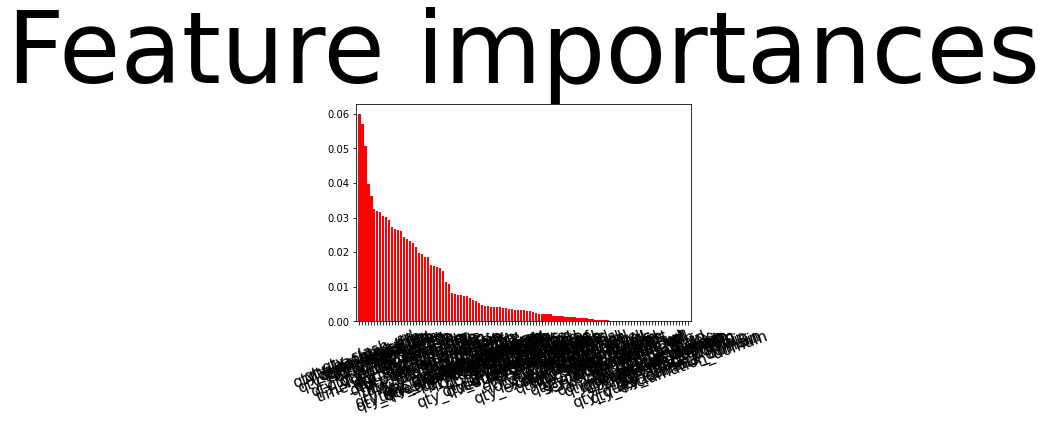

In [66]:
#find the importance ranking 
#use the best parameters from gridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=3, bootstrap= False, min_samples_split=3,
                             max_depth=None, min_samples_leaf=10)


forest=clf.fit(X, y)

#label for x-axis
features_name = np.array(X.columns.values)
features_name

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances",size=100)
plt.bar(range(X.shape[1]), importances[indices],
      yerr=std[indices], color='r' , align="center")
plt.xticks(range(X.shape[1]), features_name[indices],rotation=20,fontsize = 15)
plt.xlim([-1, X.shape[1]])
plt.show()

In [74]:
# save Random Forest model to file
import pickle
pickle.dump(forest,open('/content/RandomForest-SavedModel','wb'))
random_forest = pickle.load(open('/content/RandomForest.pkl','rb'))
random_forest.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [80]:
import joblib
joblib.dump(model, 'RandomForestJoblib')
randomforestJOBLIB = joblib.load('/content/RandomForestJoblib')
randomforestJOBLIB.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

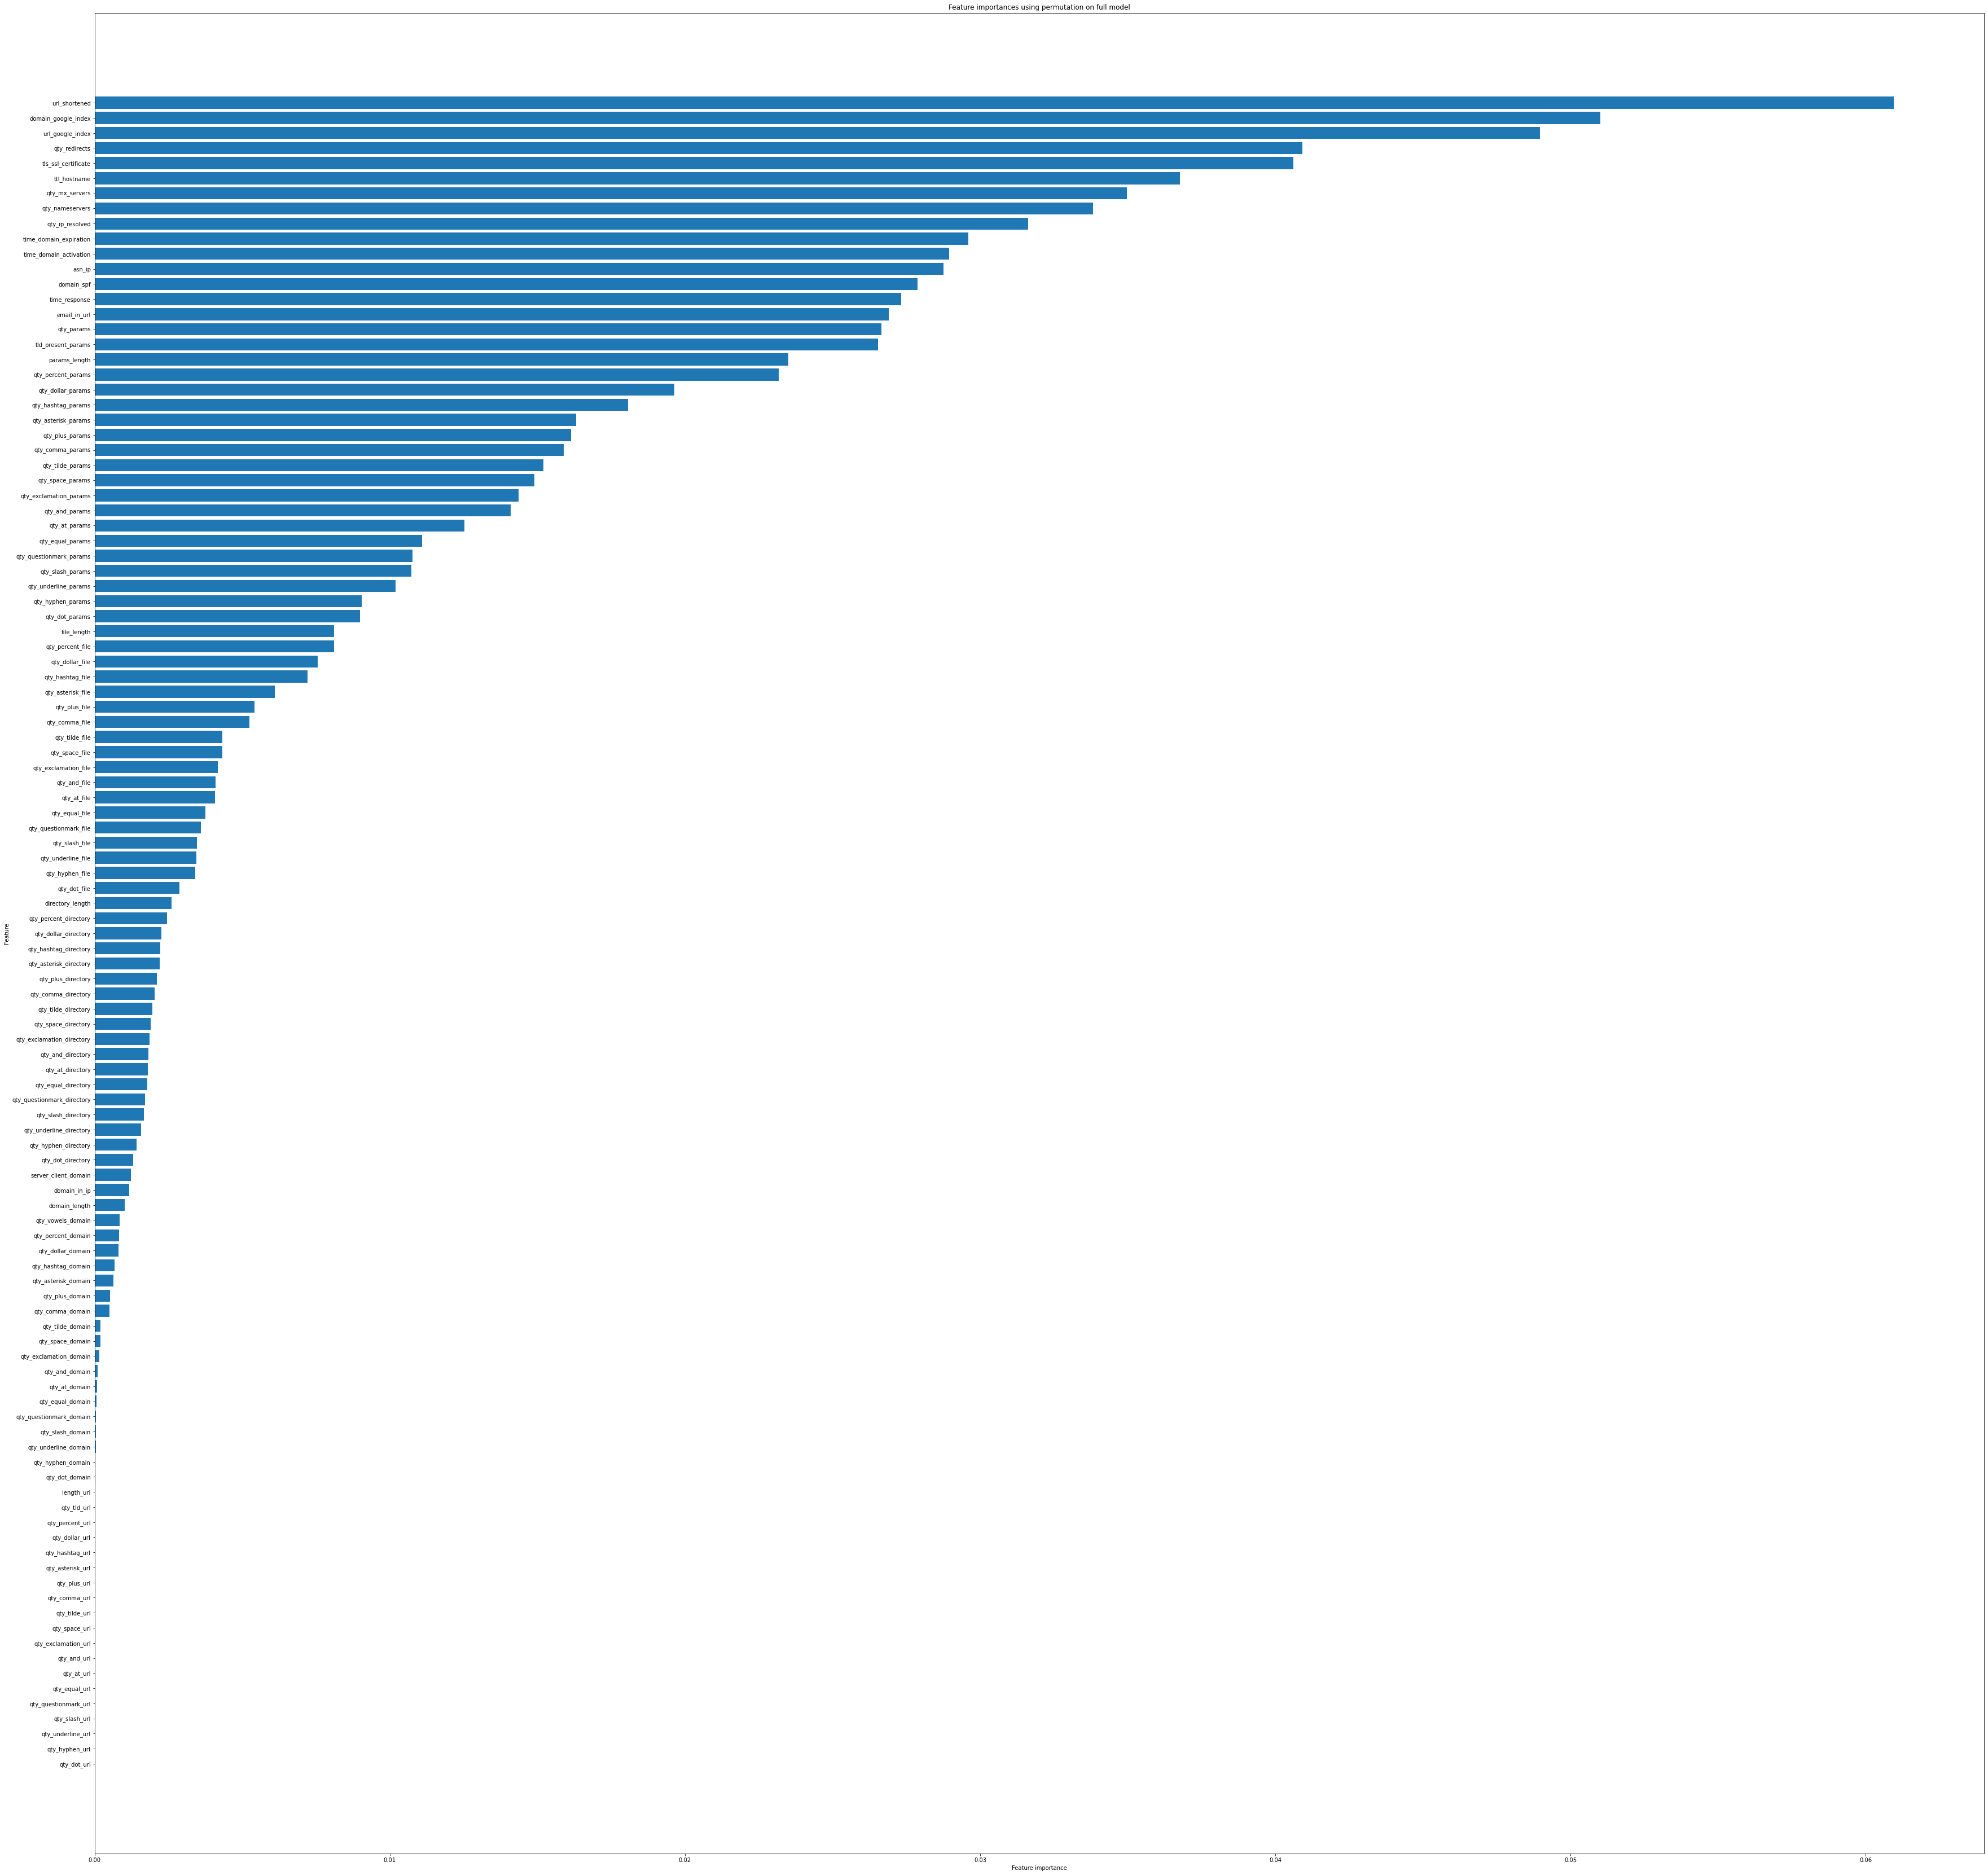

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(60,60))
n_features = X_train.shape[1]
sorted_ind = forest.feature_importances_.argsort()
plt.barh(range(n_features), forest.feature_importances_[sorted_ind], align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()